 Supongamos que trabajamos como Científicos de Datos para una empresa del
 sector financiero y queremos determinar la cantidad de fraudes que a diario se
 podrían esperar. Para lo anterior recolectamos la información de transacciones
 sospechosas durante 30 días consecutivos.  

In [ ]:
#Nota: Utilizare librerias porque no hay ninguna especificación en la consigna de no hacerlo.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
data = pd.read_csv("transacciones(in).csv", encoding='latin-1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1800 non-null   int64 
 1   Estado      1800 non-null   object
 2   CategorÃ­a  1800 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 42.3+ KB


In [4]:
estado_count= data["Estado"].value_counts()
estado_count

Estado
sospechosa     1773
fraudulenta      27
Name: count, dtype: int64

In [5]:
data = data.rename(columns={"CategorÃ\xada": "Categoria"})
data

,ID,Estado,Categoria
0,4523,sospechosa,0
1,4524,sospechosa,0
2,4525,sospechosa,0
3,4526,sospechosa,0
4,4527,sospechosa,0
...,...,...,...
1795,6318,sospechosa,0
1796,6319,sospechosa,0
1797,6320,sospechosa,0
1798,6321,sospechosa,0


In [6]:
def unicos (df, columna):
    valores = df[columna].value_counts()
    cantidad = df[columna].nunique()
    print(f"La columna {columna} tiene {cantidad} valores únicos")
    print(valores)
    print()
    return

In [7]:
for columna in data.columns:
    unicos(data, columna)

La columna ID tiene 1800 valores únicos
ID
6322    1
4523    1
4524    1
4525    1
4526    1
       ..
4535    1
4534    1
4533    1
4532    1
4531    1
Name: count, Length: 1800, dtype: int64

La columna Estado tiene 2 valores únicos
Estado
sospechosa     1773
fraudulenta      27
Name: count, dtype: int64

La columna Categoria tiene 2 valores únicos
Categoria
0    1773
1      27
Name: count, dtype: int64



¿Qué tan probable es que en un día determinado una de estas transacciones
 sospechosas corresponda realmente a un fraude?

 Esta pregunta la asocio a Bernoulli porque o es 0 o es 1

In [8]:
total_transacciones= len(data)
#Vamos a calcular los totales de cada categoria 
Fraude_total =  data[data["Categoria"] == 1].shape[0]
Sospechosa_total= data[data["Categoria"] ==0].shape[0]

#Ahora voy a calcular la probabilidad de que una de esas transacciones se vuelva un fraude

probabilidad_fraude = (Fraude_total / Sospechosa_total)*100

In [9]:
print(f"La probabilidad de que una transacción sospechosa se vuelva un fraude es del {probabilidad_fraude:.2f}%")

La probabilidad de que una transacción sospechosa se vuelva un fraude es del 1.52%


En un dia determinado ¿cúal es la cantidad más probable que podemos
tener de transacciones fraudulentas? 

Aqui recordemos la afirmación:Para lo anterior recolectamos la información de transacciones sospechosas durante 30 dias consecutivos 

In [10]:
dias_totales = 30

#Primero quiero saber cual es el promedio de transacciones diarias 
transacciones_dia= total_transacciones / dias_totales
print(f"En promedio se realizan {transacciones_dia:.0f} transacciones diarias")
#Ahora quiero saber el promedio de sospechosas diarias
sospechosa_dia = Sospechosa_total/ dias_totales
print(f"De dichas transacciones, {sospechosa_dia:.2f} son sospechosas")
#Ahora quiero saber el promedio de fraudes diarios
fraude_dia = Fraude_total/ dias_totales
print(f"y en promedio se realiza  {fraude_dia:.2f} fraudes diarios.")


En promedio se realizan 60 transacciones diarias
De dichas transacciones, 59.10 son sospechosas
y en promedio se realiza  0.90 fraudes diarios.


In [11]:
#Ahora con con poisson 

mu= fraude_dia
x = np.arange(0, 10)  # Número posible de fraudes por día

#Keeping the example code from the class 10-13 slides (como las diaps son en ingles)

formatted_array= np.array2string(poisson.pmf(x,mu),
                                 formatter={'all': lambda x: f'{x:.2f}'})
print(f"El promedio de fraudes diarios es {mu:.2f} y la probabilidad de que ocurran entre 0 y 9 fraudes es: {formatted_array}")

El promedio de fraudes diarios es 0.90 y la probabilidad de que ocurran entre 0 y 9 fraudes es: [0.41 0.37 0.16 0.05 0.01 0.00 0.00 0.00 0.00 0.00]


Acompañe su análisis con un gráfico que facilite la interpretación

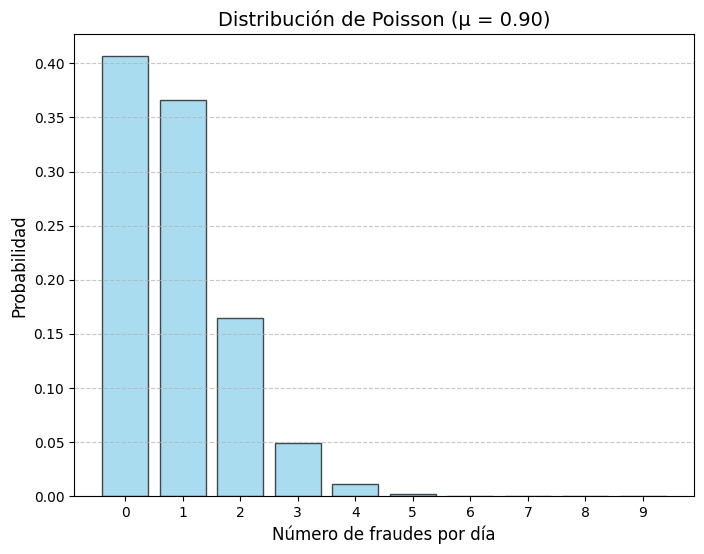

In [12]:

plt.figure(figsize=(8, 6))
plt.bar(x, poisson.pmf(x, mu), color='skyblue', alpha=0.7, edgecolor='black')
plt.title(f"Distribución de Poisson (μ = {mu:.2f})", fontsize=14)
plt.xlabel("Número de fraudes por día", fontsize=12)
plt.ylabel("Probabilidad", fontsize=12)
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()